In [57]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

Vil bruke simultane ligninger til å motivere IV. Tar utgangspunkt i enkel tilbud-etterspørselsdiagram
\begin{align}
Q^s &= \alpha_0 + \beta_0 P + u_0 \\
Q^d &= \alpha_1 + \beta_1 P + \gamma z + u_1 \\
Q &= Q^s=Q^d
\end{align}
der z er faktor som påvirker etterspøersel men ikke tilbud. Litt usikker på hva det skal være. Alt er mye vanskeligere i praksis siden man må tenke så jævlig mye, men kan jo være poeng at å ta utgangspunkt i den eksisterende litteraturen hvis man ikke er geni. Uansett, skal nå forsøke å bruke observasjon av $(Q_t,P_t,z_t)$ for $t=1,2,...,T$.

In [62]:
T = 20
α_0, β_0 = 5, 1
α_1, β_1, γ = 10, -1, 1

z = np.random.normal(size=T)
u_0 = np.random.normal(size=T)
u_1 = np.random.normal(size=T)


In [63]:
p_grid = np.linspace(0,5)
p_eq = np.empty(T)
q_eq = np.empty(T)

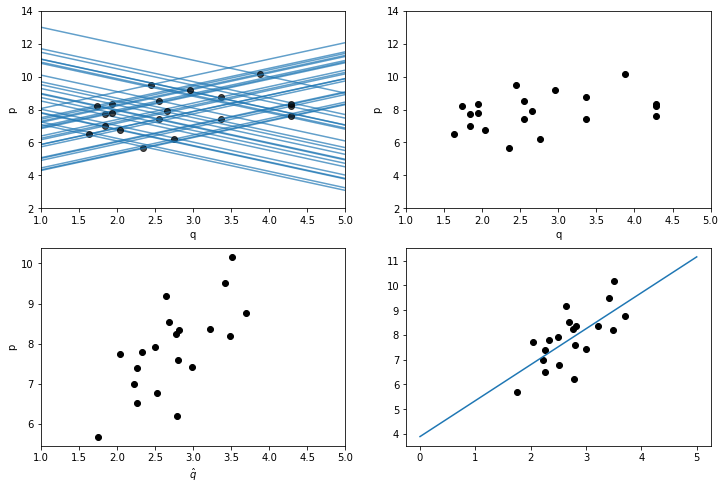

In [76]:
fig, axes = plt.subplots(2,2, figsize=(12,8))
axes = axes.flatten()
for t in range(T):
    axes[0].plot(p_grid,α_0+β_0*p_grid+u_0[t], color='tab:blue',alpha=0.7)
    axes[0].plot(p_grid,α_1+β_1*p_grid+z[t]+u_1[t], color='tab:blue', alpha=0.7)
    arr = α_0+β_0*p_grid+u_0[t] - (α_1+β_1*p_grid+z[t]+u_1[t])
    idx = np.abs(arr).argmin()
    p = p_grid[idx]
    q = α_0+β_0*p+u_0[t]
    
    p_eq[t] = p
    q_eq[t] = q
    axes[0].plot(p,q,'ok',alpha=0.7)
    axes[1].plot(p,q,'ok',alpha=1)
for ax in axes[:2]:
    ax.set(ylim=(2,14),ylabel='p',xlabel='q',xlim=(1,5))
mod = sm.OLS(p_eq,sm.add_constant(z)).fit()
xhat = mod.fittedvalues
iv_params = sm.OLS(q_eq,sm.add_constant(xhat)).fit().params
axes[2].plot(p_hat,q_eq,'ok')
axes[2].set(xlabel='$\hat{q}$', ylabel='p', xlim=(1,5))
axes[3].plot(p_hat,q_eq,'ok')
axes[3].plot(p_grid, iv_params[0]+iv_params[1]*p_grid)

fig.savefig('IV_supply.pdf')